In [1]:
# imports
import csv
import numpy as np
import pandas as pd
import datetime as dt
import os
import re
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
from matplotlib import pyplot as plt
from salishsea_tools import evaltools as et

import matplotlib.gridspec as gridspec
import matplotlib as mpl
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 
mpl.rc('legend', fontsize=12) 
mpl.rc('axes', titlesize=12) 
mpl.rc('axes', labelsize=12) 
mpl.rc('figure', titlesize=12) 
mpl.rc('font', size=12) 

from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
ms1=4
ms2=6

In [3]:
cols={'Quinsam':'plum','Cheakamus':'turquoise','Cowichan':'red','Tsolum':'firebrick',
      'Englishman':'darkorange', 'Fraser-Hope':'k','Sumas':'lightblue','Alouette':'darkgreen','Fraser-Gravesend':'gray',
     'Puntledge':'teal','Okeover':'lime','Goldstream':'yellow','Nanaimo':'fuchsia','Qualicum':'dodgerblue','YvesCreek':'brown',
     'Fraser':'gray','Campbell':'deeppink','Oyster':'papayawhip','Trent river':'lightgoldenrodyellow','Big Qualicum':'dodgerblue',
     'Tsable':'khaki','Rosewall':'lightpink','Squamish':'mediumpurple'}

In [4]:
file1=pd.read_csv('/ocean/eolson/MEOPAR/obs/IansonRiverData/DebbyFullyFormatted/elise_17april_EO.txt',
                  delim_whitespace=True,header=None,
                  names=['cruiseID','samplenum','linenum','stanum','month','day','lat','lon',
                         'press','T','S','oxy','qcdo','dic','qcdic','alk','qcalk','NO3','qcN','Si_uM','qcSi','P','qcP','river'])

In [5]:
print([int(np.floor(x)) for x in file1['cruiseID'].values])

[2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017]


In [6]:
file1['year']=[int(np.floor(x)) for x in file1['cruiseID'].values]

In [7]:
file1['month'].values

array([11, 11,  5,  5,  5, 10, 10, 10,  3,  3])

In [8]:
file1['YD']=[(dt.datetime(y,m,d)-dt.datetime(y-1,12,31)).days for y,m,d in zip(file1['year'],file1['month'].values,file1['day'].values)]

In [9]:
file1[['YD','month','day','T','S','NO3','Si_uM','river','P','qcP']]

,YD,month,day,T,S,NO3,Si_uM,river,P,qcP
0,323,11,19,8.500000,2.000000,8.100,101.360,Okeover,0.901,2
1,324,11,20,NaN,0.025200,10.030,58.550,Okeover,0.815,2
2,139,5,18,NaN,0.032300,9.520,166.610,Okeover,0.087,6
3,139,5,18,NaN,5.442986,6.930,138.080,Okeover,0.107,6
4,140,5,19,NaN,9.046011,5.775,183.065,Okeover,0.561,6
5,300,10,26,10.084317,0.017934,5.790,58.690,Puntledge,0.221,6
6,300,10,26,10.084317,0.017934,5.790,58.690,Puntledge,0.221,6
7,300,10,26,10.084317,0.017934,5.790,58.690,Puntledge,0.221,6
8,66,3,7,NaN,0.053300,4.450,72.660,Cowichan,0.159,2
9,66,3,7,NaN,0.033600,4.270,67.640,Cowichan,0.084,2


In [10]:
file2=pd.read_csv('/ocean/eolson/MEOPAR/obs/IansonRiverData/August2017/elise_short_EO.txt',
                  delim_whitespace=True,header=None,
                  names=['samplenum','dic','alk','S','NO3','Si_uM','P','river'])

In [11]:
file2['month']=8
file2['year']=2017
file2['YD']=(dt.datetime(2017,8,15)-dt.datetime(2016,12,31)).days+np.random.rand(len(file2))*10-5

In [12]:
file2

,samplenum,dic,alk,S,NO3,Si_uM,P,river,month,year,YD
0,1.0,615.43,612.61,0.055869,64.98,20.90,0.268,Goldstream,8,2017,223.575093
1,1.2,612.31,572.99,0.055869,NaN,NaN,NaN,Goldstream,8,2017,227.580620
2,2.0,613.41,598.72,0.055510,62.42,20.68,0.204,Goldstream,8,2017,230.918360
3,2.2,611.88,606.58,0.055510,NaN,NaN,NaN,Goldstream,8,2017,227.054161
4,3.0,504.78,497.15,0.037164,1.47,16.23,0.225,Cowichan,8,2017,222.256583
5,3.2,502.24,501.49,0.037164,NaN,NaN,NaN,Cowichan,8,2017,222.984394
6,4.0,507.37,496.25,0.036243,0.40,14.62,0.223,Cowichan,8,2017,226.395612
7,7.0,378.08,340.16,0.303103,1.24,6.08,0.196,Nanaimo,8,2017,227.147589
8,8.0,572.81,482.16,2.812616,0.25,13.35,0.240,Nanaimo,8,2017,230.479325
9,32.0,493.55,465.57,0.066535,1.05,19.55,0.161,Englishman,8,2017,230.890258


In [13]:
file3=pd.read_csv('/ocean/eolson/MEOPAR/obs/IansonRiverData/November2017/rawDICpartial_EONutsEdit.csv')
file3['YD']=[(dt.datetime(y,m,d)-dt.datetime(y-1,12,31)).days for y,m,d in zip(file3['year'],file3['month'].values,file3['day'].values)]
file3a=file3.loc[file3.river!='Fraserx'].copy(deep=True)
file3=file3a
file3

,date,year,month,day,time,Bottle,salt,density,DIC,N,Si,P,Riv1,river,YD
0,12/6/17,2017,12,6,9:34,1,0.0624,0.998300,957.60,7.57,67.21,0.412,Fraser,Fraser,340
1,12/6/17,2017,12,6,9:58,2,0.0611,0.998300,961.81,7.55,64.01,0.361,Fraser,Fraser,340
2,12/27/17,2017,12,27,10:40,3,5.7708,1.002600,688.15,7.32,92.02,0.629,Squamish,Squamish,361
3,12/20/17,2017,12,20,15:20,9,17.2480,1.011278,1456.28,13.40,66.74,1.322,Theodesia,Theodesia,354
4,12/20/17,2017,12,20,15:02,10,18.0282,1.011868,1508.26,13.48,69.16,1.359,Theodesia,Theodesia,354
5,12/1/17,2017,12,1,10:00,38,0.0329,0.998232,448.75,1.30,43.11,0.257,Campbell,Campbell,335
6,12/1/17,2017,12,1,10:31,40,1.4969,0.999348,575.81,2.12,58.88,0.216,Campbell,Campbell,335
7,12/1/17,2017,12,1,9:13,41,0.0307,0.998230,368.58,2.61,66.24,0.119,Oyster,Oyster,335
8,12/1/17,2017,12,1,11:57,42,6.1353,1.002868,711.62,6.28,86.82,0.477,Oyster downstream,Oyster,335
9,12/1/17,2017,12,1,10:50,43,0.3128,0.998446,406.05,2.76,65.76,0.641,Puntledge (Courtenay),Puntledge,335


In [14]:
file4=pd.read_csv('/ocean/eolson/MEOPAR/obs/IansonRiverData/June2018/logbookEOEdit.csv',skiprows=1)
file4['YD']=[(dt.datetime(y,m,d)-dt.datetime(y-1,12,31)).days for y,m,d in zip(file4['Year'],file4['Month'].values,file4['Day'].values)]

In [15]:
file4a=file4.loc[file4.River!='Dease Slough'].copy(deep=True)
file4=file4a
file4[['Location','River','Date','Salinity','Nitrate_plus_Nitrite (uM)','Silicate (uM)']]

,Location,River,Date,Salinity,Nitrate_plus_Nitrite (uM),Silicate (uM)
0,Squamish river,Squamish,20180524,0.00,2.15,2.11
1,Squamish river,Squamish,20180524,1.51,3.61,8.56
2,Squamish river,Howe Sound,20180524,3.16,1.95,14.04
3,Squamish Mouth,Lions Bay,20180524,8.34,1.13,26.27
5,Campbell River (Behind The Brick),Campbell,20180614,0.00,6.07,11.27
6,Campbell River,Campbell,20180614,10.30,6.00,57.72
7,Oyster river,Oyster,20180614,0.03,0.48,8.39
8,Puntledge river,Puntledge,20180614,0.02,1.58,23.32
9,Rosewall Creek,Rosewall,20180614,0.03,0.32,50.37
10,Qualicum River,Qualicum,20180614,0.09,1.65,44.82


In [16]:
# molecular weights
mwN=14.006720
#mwSiO3=76.083820
mwSiO2=60.08
# ammonia NH3
mwAmm=17.031 #g/mol
mwNO3=62.004 #g/mol

In [17]:
def returnDF(fname):
    obsdir='/ocean/eolson/MEOPAR/obs/ECRivers/SOGRivers'
    df=pd.read_csv(os.path.join(obsdir,fname))
    temp=[dt.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in df['Sample time']]
    df['TS']=temp
    df['YD']=[(t-dt.datetime(t.year-1,12,31)).days for t in temp]
    return df

In [18]:
#load from csv files to pandas dataframes
#start with Quinsam
df0=dict()
df0['Quinsam']=returnDF('BC08HD0004_Quinsam_19860211_to_20170130.csv')
df0['Cheakamus']=returnDF('BC08GA0010_Cheakamus_20040308_to_20170110.csv')
df0['Cowichan']=returnDF('BC08HA0018_Cowichan_19990623_to_20170214.csv')
df0['Tsolum']=returnDF('BC08HB0018_Tsolum_20050517_to_20161130.csv')
df0['Englishman']=returnDF('BC08HB0019_Englishman_20041109_to_20170214.csv')
df0['Fraser-Hope']=returnDF('BC08MF0001_FraserHope_19790717_to_20170125.csv')
df0['Sumas']=returnDF('BC08MH0027_Sumas_19790717_to_20170118.csv')
df0['Alouette']=returnDF('BC08MH0269_Alouette_20040303_to_20170214.csv')
df0['Fraser-Gravesend']=returnDF('BC08MH0453_FraserGravesend_20080902_to_20161104.csv')

In [19]:
ll=list()
for ff in df0.keys():
    ll=ll+[(ff,i) for i in df0[ff].keys() if ((re.search('[Ss]ilica',i) is not None) and (re.search('[Dd]is',i) is not None)) ]
print('Si')
for (ff,i) in ll:
    print(ff,i,np.min(df0[ff]['TS'][df0[ff][i]>=0]),np.max(df0[ff]['TS'][df0[ff][i]>=0]))

Si
Quinsam Silica Dissolved [Lab: 36] [VMV: 103469] 1990-06-05 17:20:00 1999-12-21 20:25:00
Fraser-Hope Silica Dissolved [Lab: 36] [VMV: 103469] 1991-03-08 18:10:00 1999-12-21 22:10:00
Sumas Silica Dissolved [Lab: 36] [VMV: 103469] 1990-02-28 23:20:00 1999-11-30 21:26:00


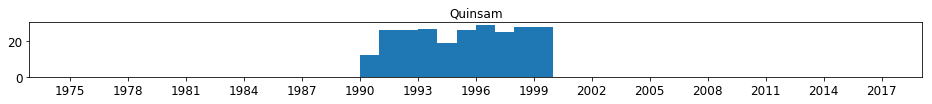

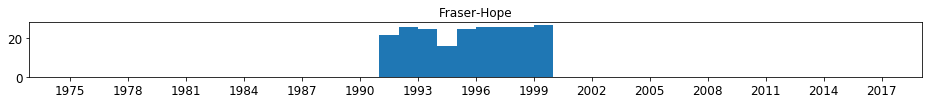

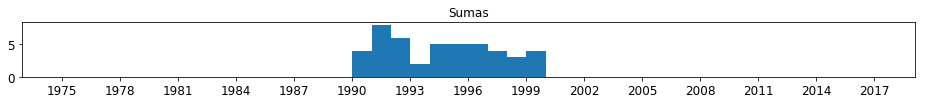

In [20]:
l=np.arange(1975,2018,1)
for (ff,i) in ll:
    fig,ax=plt.subplots(1,1,figsize=(16,1))
    yy=[x['TS'].year for i0,x in df0[ff].iterrows() if x[i]>=0]
    ax.hist(yy,l)
    ax.set_title(ff)
    ax.set_xticks(np.arange(1975,2018,3))

In [21]:
tr={'Qualicum':'Big Qualicum','YvesCreek':'Okeover'}

(0, 250)

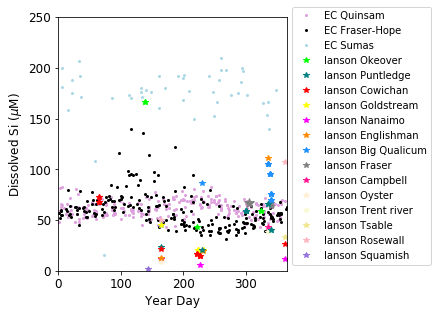

In [22]:
fig=plt.figure(figsize=(6,4.7))
gs1 = gridspec.GridSpec(1,1,left=.12,right=.65,bottom=.15,top=.9)
#gs0=gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs1[0],width_ratios=[10,1],wspace=.1)
#gs1=gridspec.GridSpecFromSubplotSpec(5,1,subplot_spec=gs1[1:],height_ratios=[.3,1,.3,1,.3],wspace=.3)
ax=fig.add_subplot(gs1[0])

ps=list()
labels=list()
for (ff,ii) in ll:
    p,=ax.plot(df0[ff]['YD'],df0[ff][ii]/mwSiO2*1000.0,'.',label='EC '+ff,markersize=ms1,color=cols[ff])
    if not ('EC '+ff in labels):
        ps.append(p)
        labels.append('EC '+ff)
ax.set_xlim(0,366)
ax.set_xlabel('Year Day')
ax.set_ylabel('Dissolved Si ($\mu$M)')
file1S=file1.loc[file1.S<.5]
file2S=file2.loc[file2.S<.5]
file3S=file3.loc[file3.salt<.5]
file4S=file4.loc[file4.Salinity<.5]
labeled=set()
for ff in file1S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['Si_uM']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['Si_uM']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file2S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['Si_uM']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['Si_uM']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file3S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['Si']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['Si']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file4S['River'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Silicate (uM)']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Silicate (uM)']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
ax.plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,67,'*',color=cols['Fraser'],markersize=10) # add my Fraser data point
ax.legend(ps,labels,bbox_to_anchor=(1., 1.06),fontsize=10)
ax.set_ylim(0,250)
#plt.tight_layout()
#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/riverForcing/rivSi.png',dpi=400,transparent=True)

# low summer values also have low nitrate and are associated with higher temperatures; likely biological drawdown
# rivers north of domain have even higher Si

In [23]:
obsdirF='/ocean/eolson/MEOPAR/obs/ECRivers/Flow'

Fraser=pd.read_csv(os.path.join(obsdirF,'FraserHopeDaily__Apr-12-2018_11_07_27PM.csv'),skiprows=1)
flow=dict()
#Alouette=pd.read_csv(os.path.join(obsdirF,'AlouetteDaily__Sep-1-2018_12_00_54AM.csv'),skiprows=1)
Sumas=pd.read_csv(os.path.join(obsdirF,'SumasHuntingdonDaily__Apr-12-2018_11_04_56PM.csv'),skiprows=1)
Cheakamus=pd.read_csv(os.path.join(obsdirF,'CheakamusDaily__Aug-31-2018_11_30_09PM.csv'),skiprows=1)
Cowichan=pd.read_csv(os.path.join(obsdirF,'CowichanDaily__Aug-31-2018_11_42_02PM.csv'),skiprows=1)
Englishman=pd.read_csv(os.path.join(obsdirF,'EnglishmanDaily__Aug-31-2018_11_47_05PM.csv'),skiprows=1)
Quinsam=pd.read_csv(os.path.join(obsdirF,'QuinsamDaily__Aug-31-2018_11_52_15PM.csv'),skiprows=1)
Tsolum=pd.read_csv(os.path.join(obsdirF,'TsolumDaily__Aug-31-2018_11_44_58PM.csv'),skiprows=1)
Puntledge=pd.read_csv(os.path.join(obsdirF,'PuntledgeDaily__Sep-4-2018_07_10_42PM.csv'),skiprows=1)
Goldstream=pd.read_csv(os.path.join(obsdirF,'Goldstream_08HA039_Daily__Sep-27-2018_12_47_45AM.csv'),skiprows=1)
Qualicum=pd.read_csv(os.path.join(obsdirF,'QualicumDaily__Sep-4-2018_07_22_26PM.csv'),skiprows=1)
Nanaimo=pd.read_csv(os.path.join(obsdirF,'NanaimoDaily__Sep-4-2018_07_17_25PM.csv'),skiprows=1)
Campbell=pd.read_csv(os.path.join(obsdirF,'Campbell_08HD003_Daily__Sep-27-2018_12_41_44AM.csv'),skiprows=1)
Oyster=pd.read_csv(os.path.join(obsdirF,'Oyster_08HD011_Daily__Sep-27-2018_12_38_53AM.csv'),skiprows=1)
Squamish=pd.read_csv(os.path.join(obsdirF,'Squamish_08GA022_Daily__Sep-27-2018_12_25_48AM.csv'),skiprows=1)
# PARAM=1 is daily discharge in m3/s

In [24]:
flow=dict()
#flow['Alouette']=np.mean(Alouette.loc[Alouette.PARAM==1,['Value']].values)
flow['Sumas']=np.nanmean(Sumas.loc[Sumas.PARAM==1,['Value']].values)
flow['Cheakamus']=np.mean(Cheakamus.loc[Cheakamus.PARAM==1,['Value']].values)
flow['Cowichan']=np.mean(Cowichan.loc[Cowichan.PARAM==1,['Value']].values)
flow['Englishman']=np.mean(Englishman.loc[Englishman.PARAM==1,['Value']].values)
flow['Quinsam']=np.mean(Quinsam.loc[Quinsam.PARAM==1,['Value']].values)
flow['Tsolum']=np.mean(Tsolum.loc[Tsolum.PARAM==1,['Value']].values)
flow['Puntledge']=np.mean(Puntledge.loc[Puntledge.PARAM==1,['Value']].values)
flow['Goldstream']=np.mean(Goldstream.loc[Goldstream.PARAM==1,['Value']].values)
flow['Qualicum']=np.mean(Qualicum.loc[Qualicum.PARAM==1,['Value']].values)
flow['Nanaimo']=np.mean(Nanaimo.loc[Nanaimo.PARAM==1,['Value']].values)
flow['Campbell']=np.mean(Campbell.loc[Campbell.PARAM==1,['Value']].values)
flow['Oyster']=np.mean(Oyster.loc[Oyster.PARAM==1,['Value']].values)
flow['Squamish']=np.mean(Squamish.loc[Squamish.PARAM==1,['Value']].values)
flow['Okeover']=np.nan
#flow['Theodesia']=np.nan
flow['Trent river']=np.nan
flow['Tsable']=np.nan
flow['Rosewall']=np.nan

In [25]:
print('Fraser',np.mean(Fraser.loc[Fraser.PARAM==1,['Value']].values))

Fraser 2721.859996866186


In [26]:
for ikey in flow.keys():
    print(ikey, flow[ikey])

Sumas 3.422833301716779
Cheakamus 19.56170686306248
Cowichan 53.093872821298596
Englishman 13.05564300088039
Quinsam 8.583443052645654
Tsolum 10.628432715168806
Puntledge 41.593038782523315
Goldstream 0.5255528967254408
Qualicum 7.672058657528724
Nanaimo 39.827816241540866
Campbell 98.01260795487926
Oyster 13.843183905030497
Squamish 239.02607007212052
Okeover nan
Trent river nan
Tsable nan
Rosewall nan


In [27]:
np.unique(file1S.river)

array(['Cowichan', 'Okeover', 'Puntledge'], dtype=object)

In [28]:
np.unique(file2S.river)

array(['Cowichan', 'Englishman', 'Goldstream', 'Nanaimo', 'Puntledge',
       'Qualicum', 'YvesCreek'], dtype=object)

In [29]:
np.unique(file3S.river)

array(['Big Qualicum', 'Campbell', 'Cowichan', 'Englishman', 'Fraser',
       'Nanaimo', 'Oyster', 'Puntledge', 'Rosewall', 'Trent river',
       'Tsable'], dtype=object)

In [30]:
np.unique(file4S.River)

array(['Campbell', 'Cowichan', 'Englishman', 'Goldstream', 'Oyster',
       'Puntledge', 'Qualicum', 'Rosewall', 'Squamish'], dtype=object)

In [31]:
siList=dict()
Ns=dict()
#siList['Alouette']=
#siList['Cheakamus']=
siList['Sumas']=list()
Ns['Sumas']=0
for el in df0['Sumas']['Silica Dissolved [Lab: 36] [VMV: 103469]'].values:
    if not np.isnan(el):
        siList['Sumas'].append(el/mwSiO2*1000.0)
        Ns['Sumas']=Ns['Sumas']+1
#for el in df0['Sumas']['Silicon Dissolved [Lab: -54] [VMV: 1175]'].values:
#    if not np.isnan(el):
#        siList['Sumas'].append(el/mwSiO2*1000.0)
#        Ns['Sumas']=Ns['Sumas']+1

siList['Cowichan']=list()
Ns['Cowichan']=0
#for el in df0['Cowichan']['Silicon Dissolved [Lab: -54] [VMV: 108166]'].values:
#    if not np.isnan(el):
#        siList['Cowichan'].append(el/mwSiO2*1000.0)
#        Ns['Cowichan']=Ns['Cowichan']+1
for el in file1S.loc[file1S.river=='Cowichan',['Si_uM']].values:
    if not np.isnan(el):
        siList['Cowichan'].append(el)
        Ns['Cowichan']=Ns['Cowichan']+1
for el in file2S.loc[file2S.river=='Cowichan',['Si_uM']].values:
    if not np.isnan(el):
        siList['Cowichan'].append(el)
        Ns['Cowichan']=Ns['Cowichan']+1
for el in file3S.loc[file3S.river=='Cowichan',['Si']].values:
    if not np.isnan(el):
        siList['Cowichan'].append(el)
        Ns['Cowichan']=Ns['Cowichan']+1
for el in file4S.loc[file4S.River=='Cowichan',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Cowichan'].append(el)
        Ns['Cowichan']=Ns['Cowichan']+1

siList['Englishman']=list()
Ns['Englishman']=0
#for el in df0['Englishman']['Silicon Dissolved [Lab: -54] [VMV: 108166]'].values:
#    if not np.isnan(el):
#        siList['Englishman'].append(el/mwSiO2*1000.0)
#        Ns['Englishman']=Ns['Englishman']+1
for el in file2S.loc[file2S.river=='Englishman',['Si_uM']].values:
    if not np.isnan(el):
        siList['Englishman'].append(el)
        Ns['Englishman']=Ns['Englishman']+1
for el in file3S.loc[file3S.river=='Englishman',['Si']].values:
    if not np.isnan(el):
        siList['Englishman'].append(el)
        Ns['Englishman']=Ns['Englishman']+1
for el in file4S.loc[file4S.River=='Englishman',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Englishman'].append(el)
        Ns['Englishman']=Ns['Englishman']+1

siList['Quinsam']=list()
Ns['Quinsam']=0
for el in df0['Quinsam']['Silica Dissolved [Lab: 36] [VMV: 103469]'].values:
    if not np.isnan(el):
        siList['Quinsam'].append(el/mwSiO2*1000.0)
        Ns['Quinsam']=Ns['Quinsam']+1

#siList['Tsolum']=list()
#Ns['Tsolum']=0
#for el in df0['Tsolum']['Silicon Dissolved [Lab: -54] [VMV: 108166]'].values:
#    if not np.isnan(el):
#        siList['Tsolum'].append(el/mwSiO2*1000.0)
#        Ns['Tsolum']=Ns['Tsolum']+1

siList['Puntledge']=list()
Ns['Puntledge']=0
for el in file1S.loc[file1S.river=='Puntledge',['Si_uM']].values:
    if not np.isnan(el):
        siList['Puntledge'].append(el)
        Ns['Puntledge']=Ns['Puntledge']+1
for el in file2S.loc[file2S.river=='Puntledge',['Si_uM']].values:
    if not np.isnan(el):
        siList['Puntledge'].append(el)
        Ns['Puntledge']=Ns['Puntledge']+1
for el in file3S.loc[file3S.river=='Puntledge',['Si']].values:
    if not np.isnan(el):
        siList['Puntledge'].append(el)
        Ns['Puntledge']=Ns['Puntledge']+1
for el in file4S.loc[file4S.River=='Puntledge',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Puntledge'].append(el)
        Ns['Puntledge']=Ns['Puntledge']+1
    
siList['Goldstream']=list()
Ns['Goldstream']=0
for el in file2S.loc[file2S.river=='Goldstream',['Si_uM']].values:
    if not np.isnan(el):
        siList['Goldstream'].append(el)
        Ns['Goldstream']=Ns['Goldstream']+1
for el in file4S.loc[file4S.River=='Goldstream',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Goldstream'].append(el)
        Ns['Goldstream']=Ns['Goldstream']+1
    
siList['Qualicum']=list()
Ns['Qualicum']=0
for el in file2S.loc[file2S.river=='Qualicum',['Si_uM']].values:
    if not np.isnan(el):
        siList['Qualicum'].append(el)
        Ns['Qualicum']=Ns['Qualicum']+1
for el in file3S.loc[file3S.river=='Big Qualicum',['Si']].values:
    if not np.isnan(el):
        siList['Qualicum'].append(el)
        Ns['Qualicum']=Ns['Qualicum']+1
for el in file4S.loc[file4S.River=='Qualicum',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Qualicum'].append(el)
        Ns['Qualicum']=Ns['Qualicum']+1
    
siList['Nanaimo']=list()
Ns['Nanaimo']=0
for el in file2S.loc[file2S.river=='Nanaimo',['Si_uM']].values:
    if not np.isnan(el):
        siList['Nanaimo'].append(el)
        Ns['Nanaimo']=Ns['Nanaimo']+1
for el in file3S.loc[file3S.river=='Nanaimo',['Si']].values:
    if not np.isnan(el):
        siList['Nanaimo'].append(el)
        Ns['Nanaimo']=Ns['Nanaimo']+1
for el in file4S.loc[file4S.River=='Nanaimo',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Nanaimo'].append(el)
        Ns['Nanaimo']=Ns['Nanaimo']+1

siList['Okeover']=list()
Ns['Okeover']=0
for el in file1S.loc[file1S.river=='Cowichan',['Si_uM']].values:
    if not np.isnan(el):
        siList['Okeover'].append(el)
        Ns['Okeover']=Ns['Okeover']+1
for el in file2S.loc[file2S.river=='YvesCreek',['Si_uM']].values:
    if not np.isnan(el):
        siList['Okeover'].append(el)
        Ns['Okeover']=Ns['Okeover']+1
        
siList['Campbell']=list()
Ns['Campbell']=0
for el in file3S.loc[file3S.river=='Campbell',['Si']].values:
    if not np.isnan(el):
        siList['Campbell'].append(el)
        Ns['Campbell']=Ns['Campbell']+1
for el in file4S.loc[file4S.River=='Campbell',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Campbell'].append(el)
        Ns['Campbell']=Ns['Campbell']+1
        
siList['Oyster']=list()
Ns['Oyster']=0
for el in file3S.loc[file3S.river=='Oyster',['Si']].values:
    if not np.isnan(el):
        siList['Oyster'].append(el)
        Ns['Oyster']=Ns['Oyster']+1
for el in file4S.loc[file4S.River=='Oyster',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Oyster'].append(el)
        Ns['Oyster']=Ns['Oyster']+1
        
siList['Rosewall']=list()
Ns['Rosewall']=0
for el in file4S.loc[file4S.River=='Rosewall',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Rosewall'].append(el)
        Ns['Rosewall']=Ns['Rosewall']+1
        
siList['Squamish']=list()
Ns['Squamish']=0
for el in file4S.loc[file4S.River=='Squamish',['Silicate (uM)']].values:
    if not np.isnan(el):
        siList['Squamish'].append(el)
        Ns['Squamish']=Ns['Squamish']+1
        
siList['Trent river']=list()
Ns['Trent river']=0
for el in file3S.loc[file3S.river=='Trent river',['Si']].values:
    if not np.isnan(el):
        siList['Trent river'].append(el)
        Ns['Trent river']=Ns['Trent river']+1
        
siList['Tsable']=list()
Ns['Tsable']=0
for el in file3S.loc[file3S.river=='Tsable',['Si']].values:
    if not np.isnan(el):
        siList['Tsable'].append(el)
        Ns['Tsable']=Ns['Tsable']+1

In [32]:
dflist=list()
silistAll=list()
silistNoSumas=list()
for ikey in Ns.keys():
    dflist.append((ikey,np.mean(siList[ikey]),Ns[ikey],flow[ikey]))
    for el in siList[ikey]:
        #print(ikey,el)
        silistAll.append(el)
    if not ikey=='Sumas':
        for el in siList[ikey]:
            silistNoSumas.append(el)

In [33]:
dflist

[('Sumas', 173.41009089330169, 46, 3.422833301716779),
 ('Cowichan', 36.515, 6, 53.093872821298596),
 ('Englishman', 47.693333333333335, 3, 13.05564300088039),
 ('Quinsam', 61.838957271064054, 246, 8.583443052645654),
 ('Puntledge', 46.60857142857143, 7, 41.593038782523315),
 ('Goldstream', 28.873333333333335, 3, 0.5255528967254408),
 ('Qualicum', 79.51333333333334, 6, 7.672058657528724),
 ('Nanaimo', 8.940000000000001, 2, 39.827816241540866),
 ('Okeover', 61.00333333333334, 3, nan),
 ('Campbell', 27.189999999999998, 2, 98.01260795487926),
 ('Oyster', 37.315, 2, 13.843183905030497),
 ('Rosewall', 50.37, 1, nan),
 ('Squamish', 2.11, 1, 239.02607007212052),
 ('Trent river', 38.33, 1, nan),
 ('Tsable', 33.01, 1, nan)]

In [34]:
np.mean(np.array(silistAll)),np.mean(np.array(silistNoSumas))

(75.43968990840496, array([59.57124468]))

In [35]:
dflist

[('Sumas', 173.41009089330169, 46, 3.422833301716779),
 ('Cowichan', 36.515, 6, 53.093872821298596),
 ('Englishman', 47.693333333333335, 3, 13.05564300088039),
 ('Quinsam', 61.838957271064054, 246, 8.583443052645654),
 ('Puntledge', 46.60857142857143, 7, 41.593038782523315),
 ('Goldstream', 28.873333333333335, 3, 0.5255528967254408),
 ('Qualicum', 79.51333333333334, 6, 7.672058657528724),
 ('Nanaimo', 8.940000000000001, 2, 39.827816241540866),
 ('Okeover', 61.00333333333334, 3, nan),
 ('Campbell', 27.189999999999998, 2, 98.01260795487926),
 ('Oyster', 37.315, 2, 13.843183905030497),
 ('Rosewall', 50.37, 1, nan),
 ('Squamish', 2.11, 1, 239.02607007212052),
 ('Trent river', 38.33, 1, nan),
 ('Tsable', 33.01, 1, nan)]

In [36]:
dfs=pd.DataFrame(columns=['river','si','n','flow'],data=dflist)

In [37]:
dfs

,river,si,n,flow
0,Sumas,173.410091,46,3.422833
1,Cowichan,36.515000,6,53.093873
2,Englishman,47.693333,3,13.055643
3,Quinsam,61.838957,246,8.583443
4,Puntledge,46.608571,7,41.593039
5,Goldstream,28.873333,3,0.525553
6,Qualicum,79.513333,6,7.672059
7,Nanaimo,8.940000,2,39.827816
8,Okeover,61.003333,3,NaN
9,Campbell,27.190000,2,98.012608


In [38]:
num=0
den=0
for i,row in dfs.iterrows():
    fl=row['flow'] if not np.isnan(row['flow']) else 1
    num=num+row['si']*fl
    den=den+fl
print(num/den)

20.040275553344703


In [39]:
np.mean([dfs['si']])

48.84806352841804

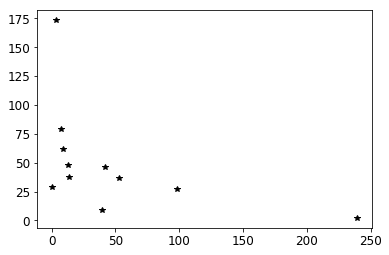

In [40]:
plt.plot(dfs['flow'],dfs['si'],'k*')

## Nitrate

In [41]:
llNO3=list()
llNH=list()
for ff in df0.keys():
    llNO3=llNO3+[(ff,i) for i in df0[ff].keys() if ((re.search('[Nn]itrate',i) is not None and re.search('[Nn]itrite',i) is None and re.search('[Dd]is',i) is not None))]
    llNH=llNH+[(ff,i) for i in df0[ff].keys() if ((re.search('[Aa]mm',i) is not None) and (re.search('[Dd]is',i) is not None))]
print('NO3')
for (ff,i) in llNO3:
    print(ff,i,np.min(df0[ff]['TS'][df0[ff][i]>=0]),np.max(df0[ff]['TS'][df0[ff][i]>=0]))
print('NH4')
for (ff,i) in llNH:
    print(ff,i)

NO3
Quinsam Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315] 1994-03-29 15:50:00 1994-09-27 15:55:00
Quinsam Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315] 1994-10-13 20:15:00 1998-12-08 18:00:00
Quinsam Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2007-09-17 15:30:00 2015-05-25 20:40:00
Cheakamus Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2005-10-20 22:45:00 2015-05-26 19:55:00
Cowichan Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2006-09-18 20:45:00 2015-05-20 20:10:00
Tsolum Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2005-09-28 19:00:00 2015-05-05 18:00:00
Englishman Nitrogen Dissolved Nitrate [Lab: 31] [VMV: 1115] 2004-11-09 19:54:00 2005-06-07 17:20:00
Englishman Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115] 2005-05-24 18:10:00 2015-05-25 17:25:00
Fraser-Hope Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315] 1994-04-26 17:00:00 1994-09-27 21:15:00
Fraser-Hope Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315] 1994-10-11 21:35:00 1998-12-08 22:10:00
Fraser-

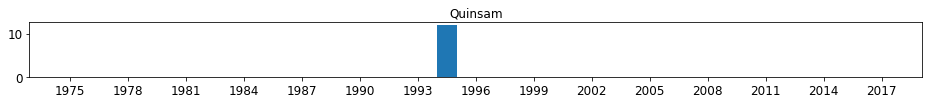

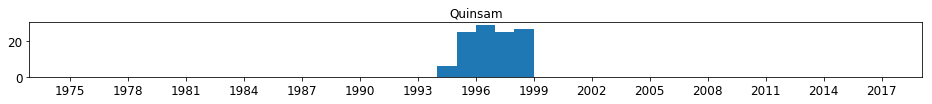

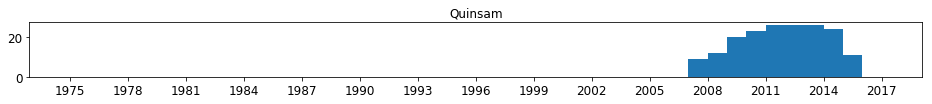

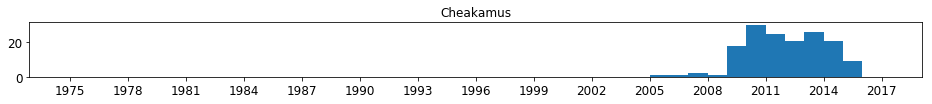

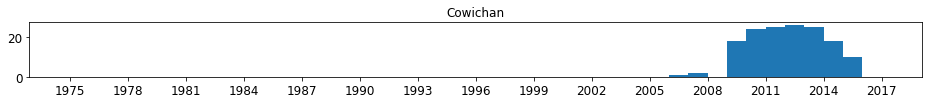

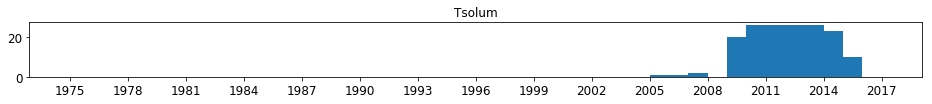

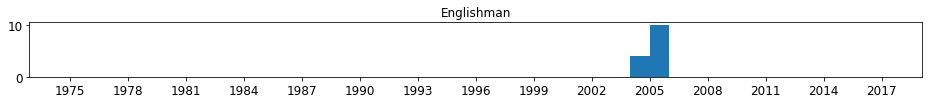

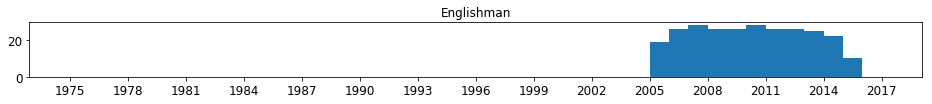

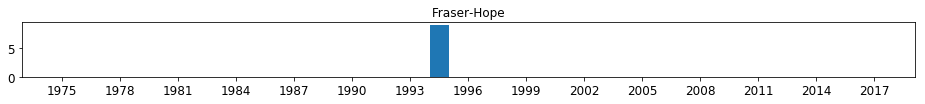

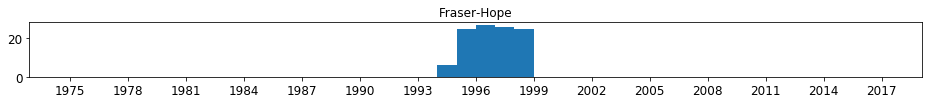

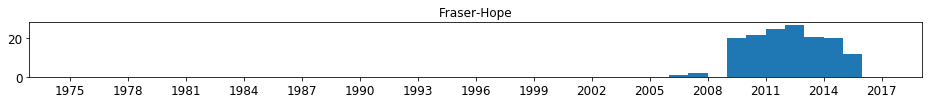

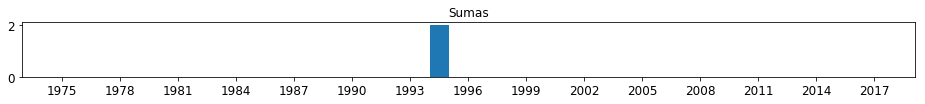

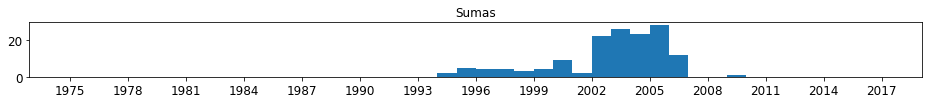

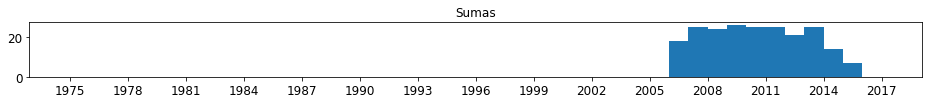

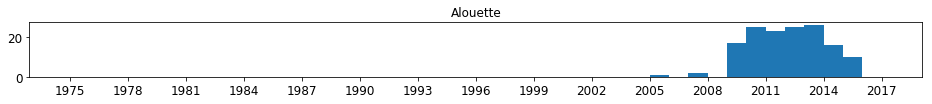

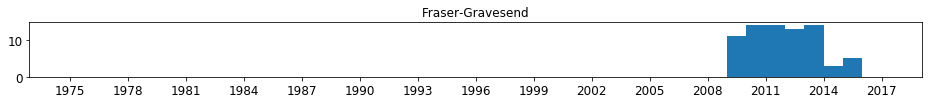

In [42]:
l=np.arange(1975,2018,1)
for (ff,i) in llNO3:
    fig,ax=plt.subplots(1,1,figsize=(16,1))
    yy=[x['TS'].year for i0,x in df0[ff].iterrows() if x[i]>=0]
    ax.hist(yy,l)
    ax.set_title(ff)
    ax.set_xticks(np.arange(1975,2018,3))

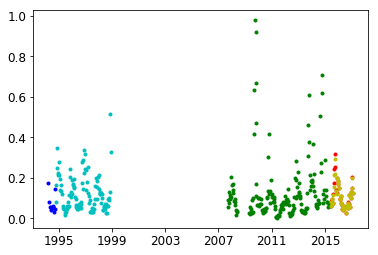

In [43]:
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrite and Nitrate (as N) [Lab: 33] [VMV: 2233]'],'r.')
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315]'],'b.')
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315]'],'c.')
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]'],'g.')
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrogen Total Nitrate [Lab: 33] [VMV: 1971]'],'y.')

(0, 20)

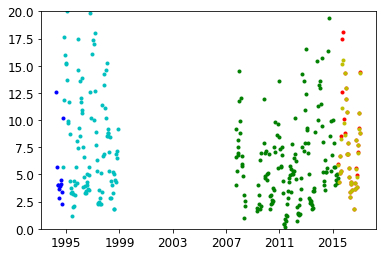

In [44]:
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrite and Nitrate (as N) [Lab: 33] [VMV: 2233]']/mwN*1000,'r.')
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315]']/mwN*1000,'b.')
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315]']/mwN*1000,'c.')
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]']/mwN*1000,'g.')
plt.plot(df0['Quinsam'].TS,df0['Quinsam']['Nitrogen Total Nitrate [Lab: 33] [VMV: 1971]']/mwN*1000,'y.')
plt.ylim(0,20)

(0, 20)

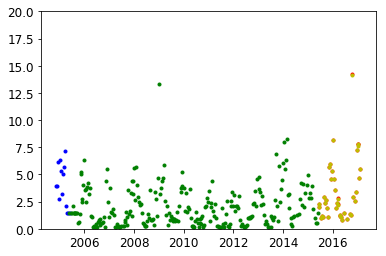

In [45]:
rname='Englishman'
plt.plot(df0[rname].TS,df0[rname]['Nitrite and Nitrate (as N) [Lab: 33] [VMV: 2233]']/mwN*1000,'r.')
plt.plot(df0[rname].TS,df0[rname]['Nitrogen Dissolved Nitrate [Lab: 31] [VMV: 1115]']/mwN*1000,'b.')
plt.plot(df0[rname].TS,df0[rname]['Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]']/mwN*1000,'g.')
plt.plot(df0[rname].TS,df0[rname]['Nitrogen Total Nitrate [Lab: 33] [VMV: 1971]']/mwN*1000,'y.')
plt.ylim(0,20)

(0, 75)

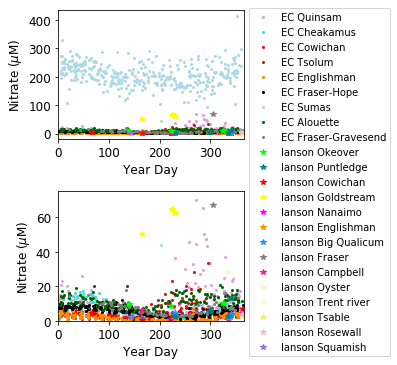

In [46]:
fig=plt.figure(figsize=(6,6))
gs1 = gridspec.GridSpec(2,1,left=.12,right=.55,bottom=.18,top=.9,hspace=.4)
#gs0=gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs1[0],width_ratios=[10,1],wspace=.1)
#gs1=gridspec.GridSpecFromSubplotSpec(5,1,subplot_spec=gs1[1:],height_ratios=[.3,1,.3,1,.3],wspace=.3)
ax0=fig.add_subplot(gs1[0])
ax1=fig.add_subplot(gs1[1])

ax=ax0
ps=list()
labels=list()
for (ff,ii) in llNO3:
    p,=ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label='EC '+ff,markersize=ms1,color=cols[ff])
    if not ('EC '+ff in labels):
        ps.append(p)
        labels.append('EC '+ff)
ax.set_xlim(0,366)
ax.set_xlabel('Year Day')
ax.set_ylabel('Nitrate ($\mu$M)')
labeled=set()
for ff in file1S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file2S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file3S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file4S['River'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
ax.plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,67,'*',color=cols['Fraser'],markersize=ms2) # add my Fraser data point
ax.legend(ps,labels,bbox_to_anchor=(1., 1.05),fontsize=10)

ax=ax1
ps=list()
labels=list()
for (ff,ii) in llNO3:
    p,=ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label='EC '+ff,markersize=ms1,color=cols[ff])
    if not ('EC '+ff in labels):
        ps.append(p)
        labels.append('EC '+ff)
ax.set_xlim(0,366)
ax.set_xlabel('Year Day')
ax.set_ylabel('Nitrate ($\mu$M)')
labeled=set()
for ff in file1S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file2S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file3S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file4S['River'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
ax.plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,67,'*',color=cols['Fraser'],markersize=ms2) # add my Fraser data point
#ax.legend(ps,labels,bbox_to_anchor=(1.3, 1.1))
ax.set_ylim(0,75)
#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/riverForcing/rivNO3.png',dpi=400,transparent=True)

##fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/rivNO3Hi.png',dpi=400,transparent=True)

(0, 80)

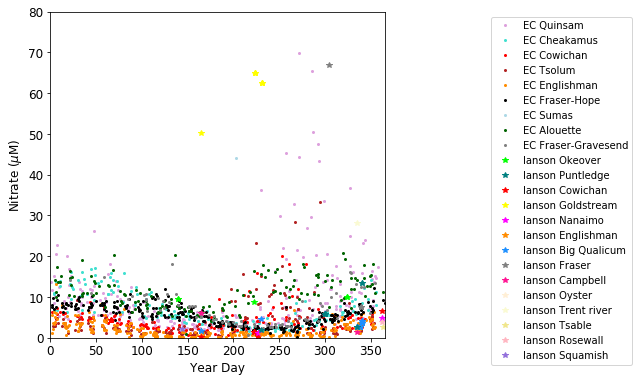

In [47]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
ps=list()
labels=list()
for (ff,ii) in llNO3:
    p,=ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label='EC '+ff,markersize=ms1,color=cols[ff])
    if not ('EC '+ff in labels):
        ps.append(p)
        labels.append('EC '+ff)
ax.set_xlim(0,366)
ax.set_xlabel('Year Day')
ax.set_ylabel('Nitrate ($\mu$M)')
labeled=set()
for ff in file1S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file2S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file3S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file4S['River'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
ax.plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,67,'*',color=cols['Fraser'],markersize=ms2) # add my Fraser data point
ax.legend(ps,labels,bbox_to_anchor=(1.3, 1.0),fontsize=10)
ax.set_ylim(0,80)
#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/riverForcing/rivNO3Lo.png',dpi=400,transparent=True)

In [48]:
def gsmooth(YD,Amm,L):
    allt=np.arange(1,367)
    fil=np.empty(np.size(allt))
    s=L/2.355
    sdict={}
    for t in allt:
        diff=[min(abs(x-t),abs(x-t+365), abs(x-t-365)) for x in YD]
        weight=[np.exp(-.5*x**2/s**2) if x <= 3*L else 0.0 for x in diff]
        #weight=[np.exp(-.5*x**2/s**2) for x in diff]
        fil[t-1]=np.sum(weight*Amm)/np.sum(weight)
        sdict[t]=fil[t-1]
    plt.plot(allt,fil,'k-')
    plt.plot(allt+365,fil,'k-')
    diff_ex=[min(abs(x-t),abs(x-t+365), abs(x-t-365)) for x in allt]
    weight_ex=[np.exp(-.5*x**2/s**2) if x <= 3*L else 0.0 for x in diff_ex]
    plt.plot(allt,weight_ex/np.sum(weight_ex)*np.max(2.0*Amm),'k:')
    plt.plot(allt+365,weight_ex/np.sum(weight_ex)*np.max(2.0*Amm),'k:')
    return(sdict)
    #plt.plot(YD,weight,'*')

Mean of EC NO3 excluding Sumas and Fraser: 6.098697369515852


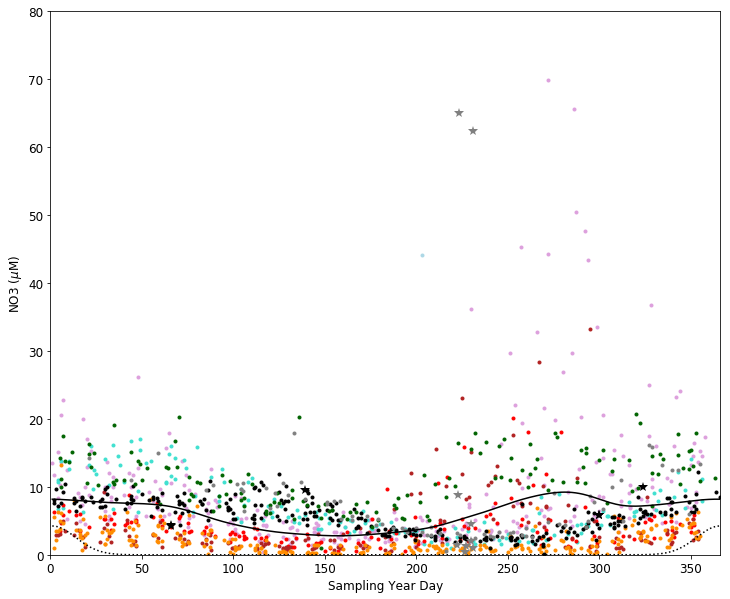

In [49]:
fig,ax=plt.subplots(1,1,figsize=(12,10))
alldata=list()
allyd=list()
for (ff,ii) in llNO3:
    ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label=ff,markersize=6,color=cols[ff])
    for i,row in df0[ff].iterrows():
        if ((not np.isnan(row[ii])) and (ff!='Sumas') and (not ff.startswith('Fraser'))):
            alldata.append(row[ii]/mwN*1000.0)
            allyd.append(row['YD'])
#ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_xlim(0,366)
ax.set_xlabel('Sampling Year Day')
ax.set_ylabel('NO3 ($\mu$M)')
plt.ylim(0,80)
print('Mean of EC NO3 excluding Sumas and Fraser:', str(np.mean(alldata)))
s=gsmooth(np.array(allyd),np.array(alldata),30)
ax.plot(file1S.YD,file1S.NO3,'*',color='black',markeredgewidth=0.0,markersize=10)
ax.plot(file2S.YD,file2S.NO3,'*',color='gray',markeredgewidth=0.0,markersize=10)

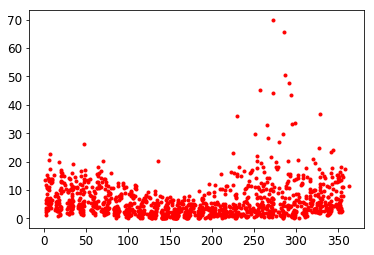

In [50]:
plt.plot(allyd,alldata,'r.')

In [51]:
rlist1=['Quinsam','Cowichan','Englishman','Tsolum']
rlist2=['Cheakamus','Fraser-Hope','Fraser-Gravesend','Alouette']

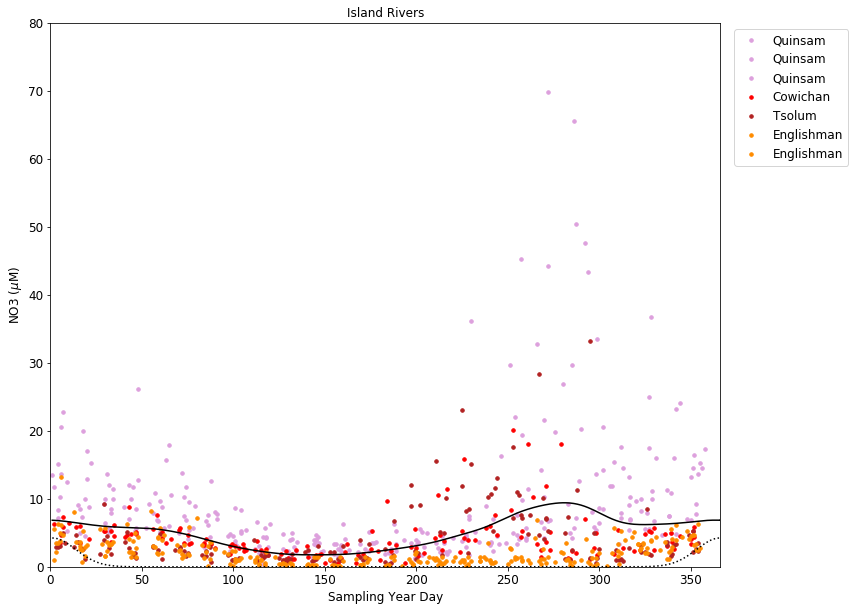

In [52]:
fig,ax=plt.subplots(1,1,figsize=(12,10))
for (ff,ii) in llNO3:
    if ff in rlist1:
        ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label=ff,markersize=7,color=cols[ff])
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_xlim(0,366)
ax.set_xlabel('Sampling Year Day')
ax.set_ylabel('NO3 ($\mu$M)')
plt.ylim(0,80)
plt.title('Island Rivers')

alldata=list()
allyd=list()
for (ff,ii) in llNO3:
    if ff in rlist1:
        for i,row in df0[ff].iterrows():
            if (not np.isnan(row[ii])):
                alldata.append(row[ii]/mwN*1000.0)
                allyd.append(row['YD'])
s=gsmooth(np.array(allyd),np.array(alldata),30)

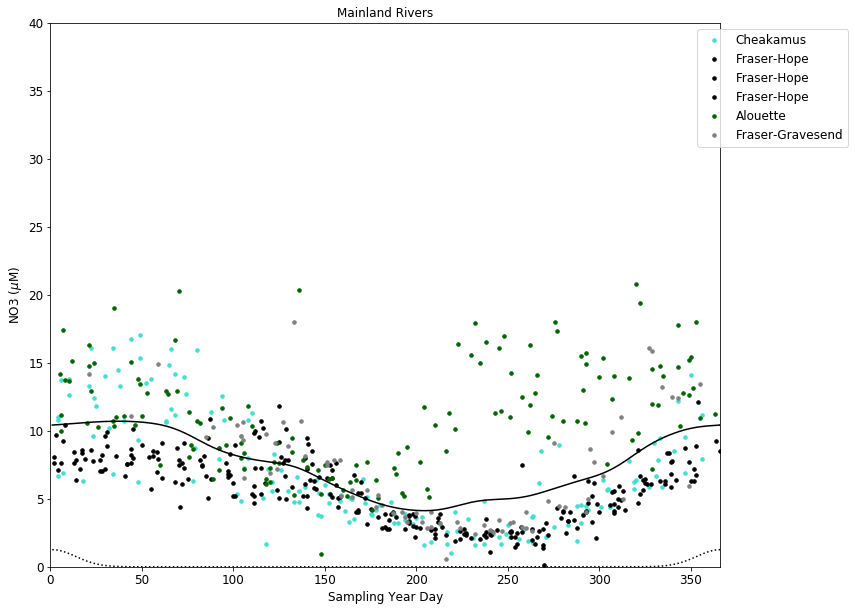

In [53]:
fig,ax=plt.subplots(1,1,figsize=(12,10))
for (ff,ii) in llNO3:
    if ff in rlist2:
        ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label=ff,markersize=7,color=cols[ff])
ax.legend(bbox_to_anchor=(1.2, 1.0))
ax.set_xlim(0,366)
ax.set_xlabel('Sampling Year Day')
ax.set_ylabel('NO3 ($\mu$M)')
plt.ylim(0,40)
plt.title('Mainland Rivers')
alldata=list()
allyd=list()
for (ff,ii) in llNO3:
    if ff in rlist2:
        for i,row in df0[ff].iterrows():
            if (not np.isnan(row[ii])):
                alldata.append(row[ii]/mwN*1000.0)
                allyd.append(row['YD'])
s=gsmooth(np.array(allyd),np.array(alldata),30)

In [54]:
llNO3

[('Quinsam', 'Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315]'),
 ('Quinsam', 'Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315]'),
 ('Quinsam', 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]'),
 ('Cheakamus', 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]'),
 ('Cowichan', 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]'),
 ('Tsolum', 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]'),
 ('Englishman', 'Nitrogen Dissolved Nitrate [Lab: 31] [VMV: 1115]'),
 ('Englishman', 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]'),
 ('Fraser-Hope', 'Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315]'),
 ('Fraser-Hope', 'Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315]'),
 ('Fraser-Hope', 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]'),
 ('Sumas', 'Nitrogen Dissolved Nitrate [Lab: 1] [VMV: 7315]'),
 ('Sumas', 'Nitrogen Dissolved Nitrate [Lab: 36] [VMV: 7315]'),
 ('Sumas', 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV: 1115]'),
 ('Alouette', 'Nitrogen Dissolved Nitrate [Lab: -54] [VMV:

In [55]:
NOlist=dict()
Ns=dict()
#NOlist['Alouette']=
#NOlist['Cheakamus']=
for rname in ('Sumas','Cowichan','Englishman','Quinsam','Tsolum','Qualicum','Nanaimo','Okeover','Cheakamus','Alouette','Puntledge'):
    NOlist[rname]=list()
    Ns[rname]=0

for riv, fname in llNO3:
    if not riv.startswith('Fraser'):
        for el in df0[riv][fname]:
            if not np.isnan(el):
                NOlist[riv].append(el/mwN*1000.0)
                Ns[riv]=Ns[riv]+1


for el in file1S.loc[file1S.river=='Cowichan',['NO3']].values:
    if not np.isnan(el):
        NOlist['Cowichan'].append(el)
        Ns['Cowichan']=Ns['Cowichan']+1
for el in file2S.loc[file2S.river=='Cowichan',['NO3']].values:
    if not np.isnan(el):
        NOlist['Cowichan'].append(el)
        Ns['Cowichan']=Ns['Cowichan']+1
for el in file3S.loc[file3S.river=='Cowichan',['N']].values:
    if not np.isnan(el):
        NOlist['Cowichan'].append(el)
        Ns['Cowichan']=Ns['Cowichan']+1
for el in file4S.loc[file4S.River=='Cowichan',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Cowichan'].append(el)
        Ns['Cowichan']=Ns['Cowichan']+1


for el in file2S.loc[file2S.river=='Englishman',['NO3']].values:
    if not np.isnan(el):
        NOlist['Englishman'].append(el)
        Ns['Englishman']=Ns['Englishman']+1
for el in file3S.loc[file3S.river=='Englishman',['N']].values:
    if not np.isnan(el):
        NOlist['Englishman'].append(el)
        Ns['Englishman']=Ns['Englishman']+1
for el in file4S.loc[file4S.River=='Englishman',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Englishman'].append(el)
        Ns['Englishman']=Ns['Englishman']+1


for el in file1S.loc[file1S.river=='Puntledge',['NO3']].values:
    if not np.isnan(el):
        NOlist['Puntledge'].append(el)
        Ns['Puntledge']=Ns['Puntledge']+1
for el in file2S.loc[file2S.river=='Puntledge',['NO3']].values:
    if not np.isnan(el):
        NOlist['Puntledge'].append(el)
        Ns['Puntledge']=Ns['Puntledge']+1
for el in file3S.loc[file3S.river=='Puntledge',['N']].values:
    if not np.isnan(el):
        NOlist['Puntledge'].append(el)
        Ns['Puntledge']=Ns['Puntledge']+1
for el in file4S.loc[file4S.River=='Puntledge',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Puntledge'].append(el)
        Ns['Puntledge']=Ns['Puntledge']+1
    
NOlist['Goldstream']=list()
Ns['Goldstream']=0
for el in file2S.loc[file2S.river=='Goldstream',['NO3']].values:
    if not np.isnan(el):
        NOlist['Goldstream'].append(el)
        Ns['Goldstream']=Ns['Goldstream']+1
for el in file4S.loc[file4S.River=='Goldstream',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Goldstream'].append(el)
        Ns['Goldstream']=Ns['Goldstream']+1
    

for el in file2S.loc[file2S.river=='Qualicum',['NO3']].values:
    if not np.isnan(el):
        NOlist['Qualicum'].append(el)
        Ns['Qualicum']=Ns['Qualicum']+1
for el in file3S.loc[file3S.river=='Big Qualicum',['N']].values:
    if not np.isnan(el):
        NOlist['Qualicum'].append(el)
        Ns['Qualicum']=Ns['Qualicum']+1
for el in file4S.loc[file4S.River=='Qualicum',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        siList['Qualicum'].append(el)
        Ns['Qualicum']=Ns['Qualicum']+1
    
for el in file2S.loc[file2S.river=='Nanaimo',['NO3']].values:
    if not np.isnan(el):
        NOlist['Nanaimo'].append(el)
        Ns['Nanaimo']=Ns['Nanaimo']+1
for el in file3S.loc[file3S.river=='Nanaimo',['N']].values:
    if not np.isnan(el):
        NOlist['Nanaimo'].append(el)
        Ns['Nanaimo']=Ns['Nanaimo']+1
for el in file4S.loc[file4S.River=='Nanaimo',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Nanaimo'].append(el)
        Ns['Nanaimo']=Ns['Nanaimo']+1

for el in file1S.loc[file1S.river=='Cowichan',['NO3']].values:
    if not np.isnan(el):
        NOlist['Okeover'].append(el)
        Ns['Okeover']=Ns['Okeover']+1
for el in file2S.loc[file2S.river=='YvesCreek',['NO3']].values:
    if not np.isnan(el):
        NOlist['Okeover'].append(el)
        Ns['Okeover']=Ns['Okeover']+1
        
NOlist['Campbell']=list()
Ns['Campbell']=0
for el in file3S.loc[file3S.river=='Campbell',['N']].values:
    if not np.isnan(el):
        NOlist['Campbell'].append(el)
        Ns['Campbell']=Ns['Campbell']+1
for el in file4S.loc[file4S.River=='Campbell',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Campbell'].append(el)
        Ns['Campbell']=Ns['Campbell']+1
        
NOlist['Oyster']=list()
Ns['Oyster']=0
for el in file3S.loc[file3S.river=='Oyster',['N']].values:
    if not np.isnan(el):
        NOlist['Oyster'].append(el)
        Ns['Oyster']=Ns['Oyster']+1
for el in file4S.loc[file4S.River=='Oyster',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Oyster'].append(el)
        Ns['Oyster']=Ns['Oyster']+1
        
NOlist['Rosewall']=list()
Ns['Rosewall']=0
for el in file4S.loc[file4S.River=='Rosewall',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Rosewall'].append(el)
        Ns['Rosewall']=Ns['Rosewall']+1
        
NOlist['Squamish']=list()
Ns['Squamish']=0
for el in file4S.loc[file4S.River=='Squamish',['Nitrate_plus_Nitrite (uM)']].values:
    if not np.isnan(el):
        NOlist['Squamish'].append(el)
        Ns['Squamish']=Ns['Squamish']+1
        
NOlist['Trent river']=list()
Ns['Trent river']=0
for el in file3S.loc[file3S.river=='Trent river',['N']].values:
    if not np.isnan(el):
        NOlist['Trent river'].append(el)
        Ns['Trent river']=Ns['Trent river']+1
        
NOlist['Tsable']=list()
Ns['Tsable']=0
for el in file3S.loc[file3S.river=='Tsable',['N']].values:
    if not np.isnan(el):
        NOlist['Tsable'].append(el)
        Ns['Tsable']=Ns['Tsable']+1

In [56]:
dNO=list()
dNOAll=list()
dNONoSumas=list()
for ikey in NOlist.keys():
    dNO.append((ikey,np.mean(NOlist[ikey]),Ns[ikey]))
    for el in NOlist[ikey]:
        #print(ikey,el)
        dNOAll.append(el)
    if not ikey=='Sumas':
        for el in NOlist[ikey]:
            dNONoSumas.append(el)

In [57]:
dNO

[('Sumas', 207.30045576522627, 357),
 ('Cowichan', 4.19533984572198, 155),
 ('Englishman', 2.064858164138561, 279),
 ('Quinsam', 8.853557601321466, 301),
 ('Tsolum', 4.148629775720077, 161),
 ('Qualicum', 3.53, 6),
 ('Nanaimo', 3.005, 2),
 ('Okeover', 5.816666666666666, 3),
 ('Cheakamus', 6.944178315146057, 155),
 ('Alouette', 11.207674503430471, 145),
 ('Puntledge', 5.298571428571429, 7),
 ('Goldstream', 59.25, 3),
 ('Campbell', 3.685, 2),
 ('Oyster', 1.545, 2),
 ('Rosewall', 0.32, 1),
 ('Squamish', 2.15, 1),
 ('Trent river', 28.05, 1),
 ('Tsable', 2.61, 1)]

In [58]:
dfno=pd.DataFrame(columns=['river','no3','n'],data=dNO)

In [59]:
dfno

,river,no3,n
0,Sumas,207.300456,357
1,Cowichan,4.195340,155
2,Englishman,2.064858,279
3,Quinsam,8.853558,301
4,Tsolum,4.148630,161
5,Qualicum,3.530000,6
6,Nanaimo,3.005000,2
7,Okeover,5.816667,3
8,Cheakamus,6.944178,155
9,Alouette,11.207675,145


In [60]:
np.mean(dfno['no3'])

19.998607336996834

In [61]:
np.mean(dfno.loc[dfno.river!='Sumas',['no3']])

no3    8.980852
dtype: float64

In [62]:
np.mean(np.array(dNOAll)),np.mean(np.array(dNONoSumas))

(51.591705557116455, 6.176653413084409)

## Ammonia

In [63]:
llNH

[('Quinsam', 'Ammonia Dissolved [Lab: 1] [VMV: 7557]'),
 ('Quinsam', 'Ammonia Dissolved [Lab: -54] [VMV: 1109]'),
 ('Cheakamus', 'Ammonia Dissolved [Lab: 31] [VMV: 1104]'),
 ('Cheakamus', 'Ammonia Dissolved [Lab: -54] [VMV: 1104]'),
 ('Cheakamus', 'Ammonia Dissolved [Lab: -54] [VMV: 1074]'),
 ('Cheakamus', 'Ammonia Dissolved [Lab: -54] [VMV: 1109]'),
 ('Cowichan', 'Ammonia Dissolved [Lab: -54] [VMV: 1104]'),
 ('Cowichan', 'Ammonia Dissolved [Lab: -54] [VMV: 1109]'),
 ('Tsolum', 'Ammonia Dissolved [Lab: -54] [VMV: 1104]'),
 ('Tsolum', 'Ammonia Dissolved [Lab: -54] [VMV: 1109]'),
 ('Englishman', 'Ammonia Dissolved [Lab: -54] [VMV: 1109]'),
 ('Fraser-Hope', 'Ammonia Dissolved [Lab: 1] [VMV: 7557]'),
 ('Sumas', 'Ammonia Dissolved [Lab: 1] [VMV: 7557]'),
 ('Sumas', 'Ammonia Dissolved [Lab: -54] [VMV: 1109]'),
 ('Alouette', 'Ammonia Dissolved [Lab: -54] [VMV: 1104]'),
 ('Fraser-Gravesend', 'Ammonia Dissolved [Lab: -54] [VMV: 1109]')]

Mean of NH: 4.648843499865896
Mean of NH, no Sumas: 4.299217855260097


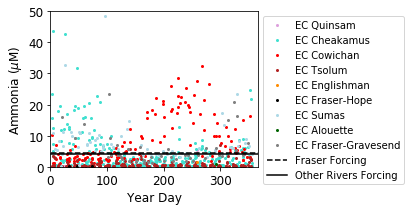

In [82]:
fig=plt.figure(figsize=(6,3))
gs1 = gridspec.GridSpec(1,1,left=.12,right=.6,bottom=.18,top=.9)
ax=fig.add_subplot(gs1[0])
ps=list()
labels=list()
alldata=list()
dataNoSumas=list()
allyd=list()
for (ff,ii) in llNH:
    p,=ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label='EC '+ff,markersize=ms1,color=cols[ff])
    if not ('EC '+ff in labels):
        ps.append(p)
        labels.append('EC '+ff)
    for i,row in df0[ff].iterrows():
        if ((not np.isnan(row[ii])) and (row[ii]/mwN*1000.0>0)):
            alldata.append(row[ii]/mwN*1000.0)
            allyd.append(row['YD'])
            if not ff.startswith('Sumas'): #(ff.startswith('Fraser') or
                dataNoSumas.append(row[ii]/mwN*1000.0)
ax.set_xlim(0,366)
ax.set_ylim(-0,50)
ax.set_xlabel('Year Day')
ax.set_ylabel('Ammonia ($\mu$M)')
p1,=ax.plot((1,366),(4.43,4.43),'k--')
p2,=ax.plot((1,366),(4.09,4.09),'k-')
ps.append(p1);ps.append(p2);
labels.append('Fraser Forcing')
labels.append('Other Rivers Forcing')
ax.legend(ps,labels,bbox_to_anchor=(1., 1),fontsize=10)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/riverForcing/rivNH.png',dpi=400,transparent=True)

print('Mean of NH:', str(np.mean(alldata)))
print('Mean of NH, no Sumas:', str(np.mean(dataNoSumas)))

In [65]:
NHlist=dict()
NHs=dict()
allriv=list()
for riv, fname in llNH:
    if not riv.startswith('Fraser'):
        allriv.append(riv)
allriv=np.unique(allriv)
for rname in allriv:
    NHlist[rname]=list()
    NHs[rname]=0

for riv, fname in llNH:
    if not riv.startswith('Fraser'):
        for el in df0[riv][fname]:
            if ((not np.isnan(el)) and (el>0)):
                NHlist[riv].append(el/mwN*1000.0)
                NHs[riv]=NHs[riv]+1

In [66]:
dNH=list()
for ik in NHlist.keys():
    dNH.append((ik,np.mean(NHlist[ik]),NHs[ik]))

In [67]:
dfnh=pd.DataFrame(columns=['river','nh','n'],data=dNH)

In [68]:
dfnh

,river,nh,n
0,Alouette,0.856732,1
1,Cheakamus,4.226517,279
2,Cowichan,8.533629,135
3,Englishman,1.570675,1
4,Quinsam,1.130410,6
5,Sumas,7.850415,70
6,Tsolum,0.884648,167


In [69]:
np.mean(dfnh['nh'])

3.5790036338800815

In [70]:
np.mean(dfnh.loc[dfnh.river!='Sumas',['nh']])

nh    2.867102
dtype: float64

Load old and new model forcing and compare

In [71]:
# this is the file the HC201812 was run with:
constsOld=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/rivers-climatology/bio/R201812_bioConst.nc')
constsNew=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/rivers-climatology/bio/R201906_bioConst.nc')

In [72]:
for ikey in ('nh4',): # nh4 is only nonzero nutrient taken from this file
    print('old',ikey, np.min(constsOld.variables[ikey]),np.max(constsOld.variables[ikey]))
    print('new',ikey, np.min(constsNew.variables[ikey]),np.max(constsNew.variables[ikey]))

old nh4 4.09 4.42713321781369
new nh4 4.232553307769091 4.3


In [73]:
(4.23-4.09)/4.09*100,(4.3-4.43)/4.43*100

(3.422982885085588, -2.934537246049659)

In [74]:
fnameO='/data/eolson/MEOPAR/NEMO-forcing-new/rivers-climatology/bio/R201809_2_bioClim_'
fnameN='/data/eolson/MEOPAR/NEMO-forcing-new/rivers-climatology/bio/R201906_bioClim_'
listFraserOldN=list()
listFraserNewN=list()
listFraserOldSi=list()
listFraserNewSi=list()
year=2016
for yearday in range(1,367):
    t2=dt.date(year, 1, 1) + dt.timedelta(days = yearday - 1)
    #datestr='y'+t2.strftime('%Y')+'m'+t2.strftime('%m')+'d'+t2.strftime('%d')
    datestr='m'+t2.strftime('%m')+'d'+t2.strftime('%d')
    new=nc.Dataset(fnameN+datestr+'.nc')
    old=nc.Dataset(fnameO+datestr+'.nc')
    if yearday==1:
        print('old consts:','no3',old.variables['no3'][0,200,200],'sil:',old.variables['sil'][0,200,200])
        print('new consts:','no3',new.variables['no3'][0,200,200],'sil:',new.variables['sil'][0,200,200])
    listFraserNewN.append((new.variables['no3'][0,450,382]))
    listFraserOldN.append((old.variables['no3'][0,450,382]))
    listFraserNewSi.append((new.variables['sil'][0,450,382]))
    listFraserOldSi.append((old.variables['sil'][0,450,382]))
    new.close()
    old.close()

old consts: no3 6.26 sil: 55.69
new consts: no3 6.18 sil: 59.57


In [75]:
(6.18-6.26)/6.26*100,(59.57-55.69)/55.69*100

(-1.2779552715654963, 6.967139522355903)

In [76]:
fraclist=list()
for ii in range(0,366):
    print(ii,listFraserNewN[ii],listFraserOldN[ii],(listFraserNewN[ii]-listFraserOldN[ii])/listFraserOldN[ii]*100)
    fraclist.append((listFraserNewN[ii]-listFraserOldN[ii])/listFraserOldN[ii]*100)
print(np.min(np.array(fraclist)),np.max(np.array(fraclist)))

0 8.2761044385522 8.527932302916945 -2.95297682274763
1 8.288278596252274 8.551341389403051 -3.076275185046033
2 8.299481150805068 8.57386811120329 -3.2002703661802965
3 8.309742295754457 8.595505995868331 -3.3245710054909394
4 8.319092483076481 8.616249248528309 -3.448794909253386
5 8.327562246755917 8.63609291824651 -3.5725723936888456
6 8.335182031345342 8.655033055245315 -3.6955494203009454
7 8.34198202730494 8.673066856450578 -3.8173904874190416
8 8.347992014782081 8.690192797045798 -3.9377812466950908
9 8.353241217456581 8.70641074616145 -4.056430818642201
10 8.35775816777504 8.721722065015822 -4.173073786663036
11 8.361570584899264 8.736129686401066 -4.287471854783162
12 8.364705266326801 8.7496381745681 -4.399415159362282
13 8.367187994105882 8.76225376515284 -4.508723230752806
14 8.369043456205192 8.773984385009417 -4.615245606045034
15 8.370295183509848 8.784839652267367 -4.71886209841662
16 8.370965502684472 8.79483085724487 -4.819482732987785
17 8.371075504861757 8.80397092

In [77]:
fraclist=list()
for ii in range(0,366):
    print(ii,listFraserNewSi[ii],listFraserOldSi[ii],(listFraserNewSi[ii]-listFraserOldSi[ii])/listFraserOldSi[ii]*100)
    fraclist.append((listFraserNewSi[ii]-listFraserOldSi[ii])/listFraserOldSi[ii]*100)
print(np.min(np.array(fraclist)),np.max(np.array(fraclist)))

0 57.08212707723338 57.026294520587676 0.09790668868647531
1 57.20616358019908 57.155069119773565 0.08939620091866957
2 57.32974017229243 57.28305227409765 0.08150385906704614
3 57.45284308880848 57.41024642563808 0.07419696974402348
4 57.57545991795264 57.536655230887035 0.06744341830419026
5 57.69757997615326 57.66228386909844 0.06121177429417498
6 57.81919469730252 57.787139371023834 0.055471384511483236
7 57.940298032288815 57.911230964311336 0.050192454025700425
8 58.06088685553464 58.03457043214628 0.04534611558661854
9 58.18096137384653 58.157172480275904 0.04090448788357658
10 58.30052553359 58.27905510818275 0.03684072325364423
11 58.41958742166028 58.40023997975088 0.03312904521644332
12 58.53815965555668 58.52075278832897 0.02974477667892292
13 58.65625975798629 58.640623611448376 0.026664359235876647
14 58.77391051127152 58.75988725018334 0.023865364187084955
15 58.89114028710748 58.87858354828827 0.02132649609159776
16 59.007983347211464 58.996757686497624 0.01902758923378

In [78]:
# now add climatology to Si and N plots

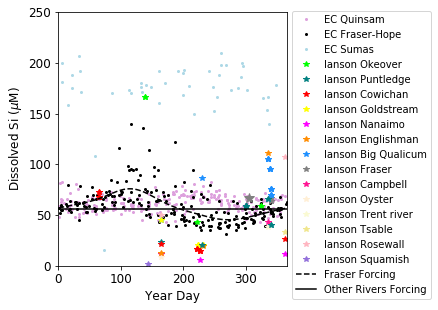

In [79]:
fig=plt.figure(figsize=(6,4.7))
gs1 = gridspec.GridSpec(1,1,left=.12,right=.65,bottom=.15,top=.9)
#gs0=gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs1[0],width_ratios=[10,1],wspace=.1)
#gs1=gridspec.GridSpecFromSubplotSpec(5,1,subplot_spec=gs1[1:],height_ratios=[.3,1,.3,1,.3],wspace=.3)
ax=fig.add_subplot(gs1[0])

ps=list()
labels=list()
for (ff,ii) in ll:
    p,=ax.plot(df0[ff]['YD'],df0[ff][ii]/mwSiO2*1000.0,'.',label='EC '+ff,markersize=ms1,color=cols[ff])
    if not ('EC '+ff in labels):
        ps.append(p)
        labels.append('EC '+ff)
ax.set_xlim(0,366)
ax.set_xlabel('Year Day')
ax.set_ylabel('Dissolved Si ($\mu$M)')
file1S=file1.loc[file1.S<.5]
file2S=file2.loc[file2.S<.5]
file3S=file3.loc[file3.salt<.5]
file4S=file4.loc[file4.Salinity<.5]
labeled=set()
for ff in file1S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['Si_uM']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['Si_uM']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file2S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['Si_uM']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['Si_uM']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file3S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['Si']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['Si']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file4S['River'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Silicate (uM)']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Silicate (uM)']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
ax.plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,67,'*',color=cols['Fraser'],markersize=10) # add my Fraser data point
p1,=ax.plot(np.arange(1,367),listFraserOldSi,'k--')# add forcing climatology for Fraser
p2,=ax.plot((1,367),(55.69,55.69),'k-')# add forcing climatology for Fraser
ps.append(p1);ps.append(p2);
labels.append('Fraser Forcing')
labels.append('Other Rivers Forcing')
ax.legend(ps,labels,bbox_to_anchor=(1., 1.025),fontsize=10)
ax.set_ylim(0,250)
#plt.tight_layout()
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/riverForcing/rivSi.png',dpi=400,transparent=True)

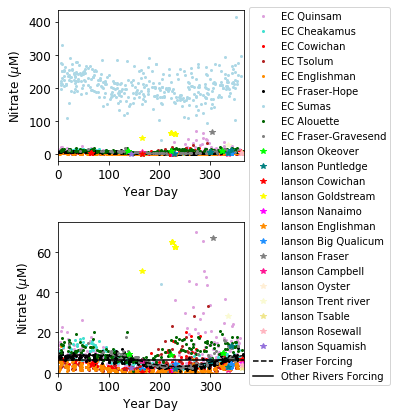

In [80]:
fig=plt.figure(figsize=(6,7))
gs1 = gridspec.GridSpec(2,1,left=.12,right=.55,bottom=.18,top=.9,hspace=.4)
#gs0=gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs1[0],width_ratios=[10,1],wspace=.1)
#gs1=gridspec.GridSpecFromSubplotSpec(5,1,subplot_spec=gs1[1:],height_ratios=[.3,1,.3,1,.3],wspace=.3)
ax0=fig.add_subplot(gs1[0])
ax1=fig.add_subplot(gs1[1])

ax=ax0
ps=list()
labels=list()
for (ff,ii) in llNO3:
    p,=ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label='EC '+ff,markersize=ms1,color=cols[ff])
    if not ('EC '+ff in labels):
        ps.append(p)
        labels.append('EC '+ff)
ax.set_xlim(0,366)
ax.set_xlabel('Year Day')
ax.set_ylabel('Nitrate ($\mu$M)')
labeled=set()
for ff in file1S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file2S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file3S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file4S['River'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
ax.plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,67,'*',color=cols['Fraser'],markersize=ms2) # add my Fraser data point
p1,=ax.plot(-1*np.arange(1,367),listFraserOldN,'k--')# add forcing climatology for Fraser
p2,=ax.plot((-1,-367),(6.26,6.26),'k-')# add forcing climatology for Fraser
ps.append(p1);ps.append(p2);
labels.append('Fraser Forcing')
labels.append('Other Rivers Forcing')
ax.legend(ps,labels,bbox_to_anchor=(1., 1.05),fontsize=10)
ax.set_xlim(0,367)

ax=ax1
ps=list()
labels=list()
for (ff,ii) in llNO3:
    p,=ax.plot(df0[ff]['YD'],df0[ff][ii]/mwN*1000.0,'.',label='EC '+ff,markersize=ms1,color=cols[ff])
    if not ('EC '+ff in labels):
        ps.append(p)
        labels.append('EC '+ff)
ax.set_xlim(0,366)
ax.set_xlabel('Year Day')
ax.set_ylabel('Nitrate ($\mu$M)')
labeled=set()
for ff in file1S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file1S.loc[file1S.river==ff,['YD']],file1S.loc[file1S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file2S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file2S.loc[file2S.river==ff,['YD']],file2S.loc[file2S.river==ff,['NO3']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file3S['river'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file3S.loc[file3S.river==ff,['YD']],file3S.loc[file3S.river==ff,['N']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
for ff in file4S['River'].values:
    ff2=ff if not (ff in tr.keys()) else tr[ff]
    if (ff2 in labeled):
        ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                label='Ianson '+ff,markersize=ms2)
    else:
        p,=ax.plot(file4S.loc[file4S.River==ff,['YD']],file4S.loc[file4S.River==ff,['Nitrate_plus_Nitrite (uM)']],'*',color=cols[ff2],
                   label='Ianson '+ff,markersize=ms2)
        ps.append(p)
        labels.append('Ianson '+ff2)
        labeled.add(ff2)
ax.plot((dt.datetime(2017,11,1)-dt.datetime(2016,12,31)).days,67,'*',color=cols['Fraser'],markersize=ms2) # add my Fraser data point
p1,=ax.plot(np.arange(1,367),listFraserOldN,'k--')# add forcing climatology for Fraser
p2,=ax.plot((1,367),(6.26,6.26),'k-')# add forcing climatology for Fraser
ps.append(p1);ps.append(p2);
labels.append('Fraser Forcing')
labels.append('Other Rivers Forcing')
#ax.legend(ps,labels,bbox_to_anchor=(1.3, 1.1))
ax.set_ylim(0,75)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/riverForcing/rivNO3.png',dpi=400,transparent=True)

#fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsMod/rivNO3Hi.png',dpi=400,transparent=True)